In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv("Life_Expectancy_No_Missing_Vals.csv").set_index("Unnamed: 0")


In [4]:
cont = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
 'hepatitis_b', 'measles','bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
 'hiv/aids', 'gdp', 'population', 'thinness__10-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
 'schooling']

cat = ['year','country', 'status']

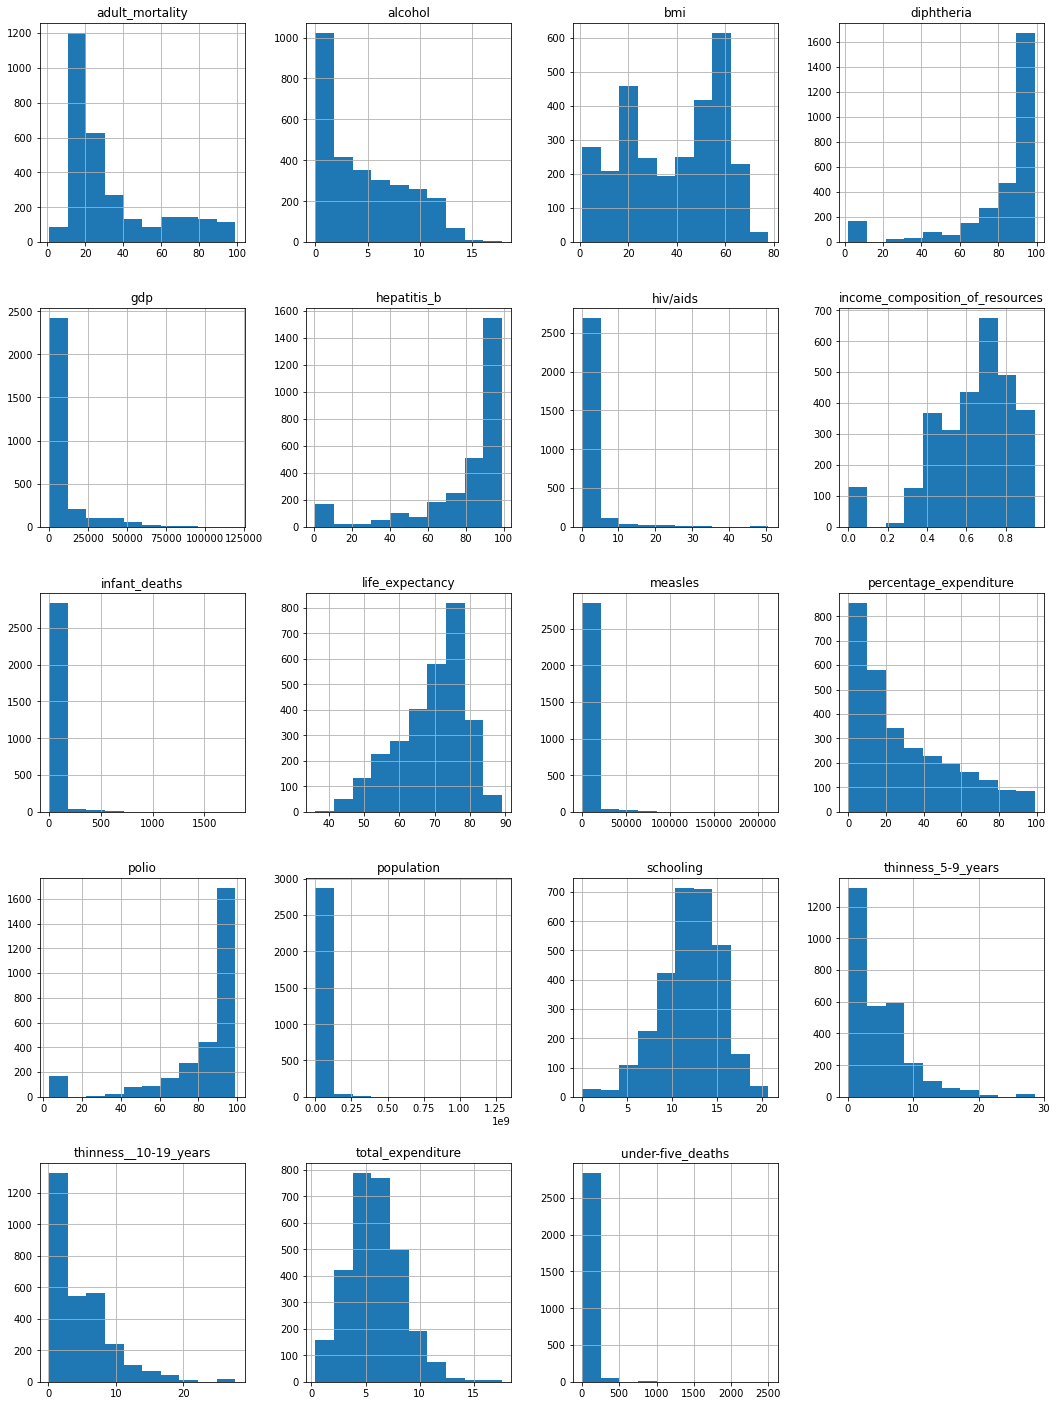

In [5]:
df[cont].hist(figsize=(18,25))
plt.show()

Based on the above, we should do the following:

- Apply Log transforms to adult mortality, alcohol, diphtheria, gdp, hepatitis_b, hiv_aids, infant deaths, measles, percentage expenditure, polio, population, thinness_5-9_years, thinness__10-19_years, under-five_deaths
- We should test our model against a log and a non log target, i think log will be better based on distribution

In [6]:
log_cols = ["adult_mortality", "alcohol", "diphtheria", "gdp", "hepatitis_b", "hiv/aids", 
        "infant_deaths", "measles", "percentage_expenditure", "polio", "population", "thinness_5-9_years", 
        "thinness__10-19_years", "under-five_deaths"]


In [7]:
df['percentage_expenditure'].values.any() == 0

False

In [8]:
df['percentage_expenditure'].isin([0]).any()

True

In [9]:
logs = []
for col in log_cols:
    if df[col].isin([0]).any():
        df[col] = df[col] + 1
        df["log_{}".format(col)] = np.log(df[col])
    else:
        df["log_{}".format(col)] = np.log(df[col])

In [10]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__10-19_years,thinness_5-9_years,gdp,population,income_composition_of_resources,schooling,log_adult_mortality,log_alcohol,log_diphtheria,log_gdp,log_hepatitis_b,log_hiv/aids,log_infant_deaths,log_measles,log_percentage_expenditure,log_polio,log_population,log_thinness_5-9_years,log_thinness__10-19_years,log_under-five_deaths
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,2015,Developing,65.0,26.3,63,0.01,72.000000,65.0,1155,19.1,84,6.0,8.16,65.0,0.1,17.2,17.3,584.259210,33736494.0,0.479,10.1,3.269569,-4.605170,4.174387,6.370345,4.174387,-2.302585,4.143135,7.051856,4.276666,1.791759,17.334091,2.850707,2.844909,4.430817
1,Afghanistan,2014,Developing,59.9,27.1,65,0.01,74.000000,62.0,493,18.6,87,58.0,8.18,62.0,0.1,17.5,17.5,612.696514,327582.0,0.476,10.0,3.299534,-4.605170,4.127134,6.417870,4.127134,-2.302585,4.174387,6.200509,4.304065,4.060443,12.699494,2.862201,2.862201,4.465908
2,Afghanistan,2013,Developing,59.9,26.8,67,0.01,74.000000,64.0,431,18.1,90,62.0,8.13,64.0,0.1,17.7,17.7,631.744976,31731688.0,0.470,9.9,3.288402,-4.605170,4.158883,6.448486,4.158883,-2.302585,4.204693,6.066108,4.304065,4.127134,17.272826,2.873565,2.873565,4.499810
3,Afghanistan,2012,Developing,59.5,27.2,70,0.01,79.000000,67.0,2788,17.6,94,67.0,8.52,67.0,0.1,17.9,18.0,669.959000,3696958.0,0.463,9.8,3.303217,-4.605170,4.204693,6.507217,4.204693,-2.302585,4.248495,7.933080,4.369448,4.204693,15.123021,2.890372,2.884801,4.543295
4,Afghanistan,2011,Developing,59.2,27.5,72,0.01,8.097109,68.0,3014,17.2,98,68.0,7.87,68.0,0.1,18.2,18.2,63.537231,2978599.0,0.454,9.5,3.314186,-4.605170,4.219508,4.151626,4.219508,-2.302585,4.276666,8.011023,2.091507,4.219508,14.906964,2.901422,2.901422,4.584967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,72.3,28,4.36,1.000000,68.0,32,27.1,43,67.0,7.13,65.0,33.6,9.4,9.4,454.366654,12777511.0,0.407,9.2,4.280824,1.472472,4.174387,6.118904,4.219508,3.514526,3.332205,3.465736,0.000000,4.204693,16.363197,2.240710,2.240710,3.761200
2924,Zimbabwe,2003,Developing,44.5,71.5,27,4.06,1.000000,7.0,999,26.7,42,7.0,6.52,68.0,36.7,9.8,9.9,453.351155,12633897.0,0.418,9.5,4.269697,1.401183,4.219508,6.116667,1.945910,3.602777,3.295837,6.906755,0.000000,1.945910,16.351894,2.292535,2.282382,3.737670
2925,Zimbabwe,2002,Developing,44.8,73.0,26,4.43,1.000000,73.0,305,26.3,41,73.0,6.53,71.0,39.8,1.2,1.3,57.348340,125525.0,0.427,10.0,4.290459,1.488400,4.262680,4.049144,4.290459,3.683867,3.258097,5.720312,0.000000,4.290459,11.740260,0.262364,0.182322,3.713572


### Do the values of schooling change significantly in developed vs developing countries?

- In this section, we will first check the distributions of schooling from these two groups
- Then, we will run a hypothesis test to determine if there is a significant difference
- If we find that there is a difference, we will plot both scatterplots of the two groups data, as well as regression lines for each group. If we find some overlap in the regression lines, then that is strong evidence that there is some interaction between the two variables. 
- If we find interaction among the variables, then we will engineer a new interaction feature in our notebook where we build a model

Text(0.5, 1.0, 'Developing Countries')

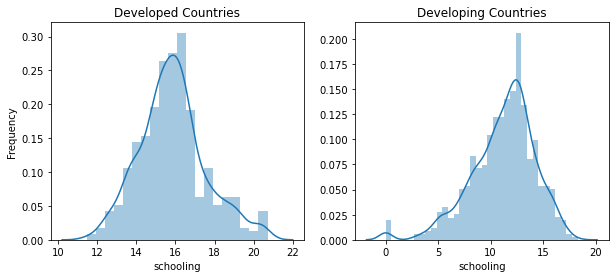

In [11]:
fig = plt.subplots(figsize=(10,4))
ax1 = plt.subplot(121)
sns.distplot(df[df.status=='Developed'].schooling, ax=ax1)
ax1.set_title("Developed Countries")
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(122)
sns.distplot(df[df.status=='Developing'].schooling, ax=ax2)
ax2.set_title("Developing Countries")


Based on the distributions above we can see that they are normal enough to perform some t tests. We want to first run a test to see if schooling changes from developed to developing countries. If we find there is a significant difference, then we will further investigate whether or not there is an interaction between schooling and status when trying to predict life expectancy.

- $H_{0}$: Schooling from different country statuses is the same
- $H_{a}$: Schooling from different country statuses is not the same

Will run a two sample t test from the two populations using an $\alpha$ of 5% 

In [12]:
developed_schooling = df[df.status == 'Developed']
developing_schooling = df[df.status == 'Developing']

In [13]:
x_devd = np.mean(developed_schooling.schooling)
x_devping = np.mean(developing_schooling.schooling)

n_devd = len(developed_schooling)
n_devping = len(developing_schooling)

s_devd = np.std(developed_schooling.schooling)
s_devping = np.std(developing_schooling.schooling)

num = ((n_devd-1)*s_devd**2) + ((n_devping-1)*s_devping**2)
denom = n_devd + n_devping - 2
s_pooled = num / denom

num = x_devd - x_devping
denom = np.sqrt(s_pooled * ((1/n_devd) + (1/n_devping)))
t = num / denom
t

33.52004010972154

Our calculated t statistic, using pooled variances and a 2 sample t test, comes out to 33.5. This is far larger than a t critical value of 1.96 for a 95% condifence test, and so we will reject the null hypothesis. Therefore, we can say with 95% confidence that schooling from developed vs developing countries is different. 

In [14]:
plt.figure(figsize=(12,7))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

school_1 = developed_schooling['schooling'].values.reshape(-1, 1)
school_2 = developing_schooling['schooling'].values.reshape(-1, 1)

regression_1.fit(school_1, developed_schooling['life_expectancy'])
regression_2.fit(school_2, developing_schooling['life_expectancy'])

# Make predictions using the testing set
pred_1 = regression_1.predict(school_1)
pred_2 = regression_2.predict(school_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

[0.92596634]
[2.05612325]


<Figure size 864x504 with 0 Axes>

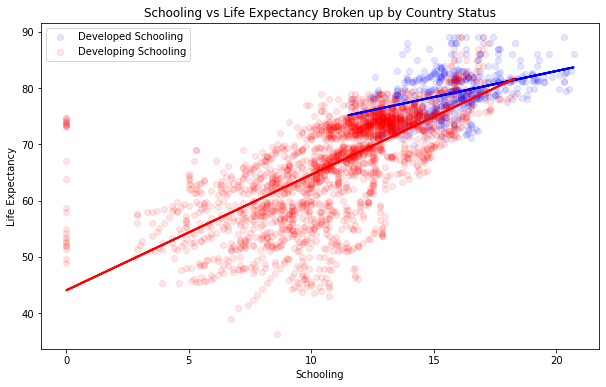

In [15]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.title("Schooling vs Life Expectancy Broken up by Country Status")

plt.scatter(school_1, developed_schooling['life_expectancy'],  color='blue', alpha = 0.1, label = 'Developed Schooling')
plt.scatter(school_2, developing_schooling['life_expectancy'],  color='red', alpha = 0.1, label = 'Developing Schooling')

plt.plot(school_1, pred_1,  color='blue', linewidth=2)
plt.plot(school_2, pred_2,  color='red', linewidth=2)

plt.ylabel('Life Expectancy')
plt.xlabel('Schooling')
plt.legend();

From the above graph, we can see that schooling is far more important in a developing country. Less schooling in a developing country has a strong impact on life expectancy, whereas in a developed country, it is less important. If we were modeling for prediction, we would likely feature engineer a column for this interaction. However, since we are modeling to show relations between predictors that are capable of being changed by a country's government and life expectancy, we will not include this in our model.

In [16]:
X = pd.concat([df, pd.get_dummies(df.status, drop_first=True)], axis=1).drop([
    'country', 'year', 'status', 'life_expectancy'],axis=1)
y = df['life_expectancy']

In [17]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2['school_status'] = X['schooling'] * X['Developing']


In [18]:
import statsmodels.api as sm
X_interact_2 = sm.add_constant(X_interact_2)
model = sm.OLS(y,X_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     571.5
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:14:30   Log-Likelihood:                -7761.9
No. Observations:                2928   AIC:                         1.559e+04
Df Residuals:                    2893   BIC:                         1.580e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              64.0914      2.115     30.302      0.000      59.944      68.239
adult_mortality                     0.0767      0.008      9.327      0.000       0.061       0.093
infant_deaths                       0.0418      0.008      5.535      0.000       0.027       0.057
alcohol                            -0.1649      0.032     -5.140      0.000      -0.228      -0.102
percentage_expenditure              0.0007      0.005      0.144      0.886      -0.008       0.010
hepatitis_b                        -0.0439      0.011     -4.089      0.000      -0.065      -0.023
measles                          9.998e-06   6.99e-06      1.431      0.153    -3.7e-06    2.37e-05
bmi                                 0.0047      0.004      1.067      0.286      -0.004       0.013
under-five_deaths                  -0.0308      0.006     -5.574      0.000      -0.042      -0.020
polio                               0.0378      0.016      2.393      0.017       0.007       0.069
total_expenditure                   0.0076      0.029      0.257      0.797      -0.050       0.065
diphtheria                          0.1148      0.016      7.060      0.000       0.083       0.147
hiv/aids                           -0.2987      0.020    -14.900      0.000      -0.338      -0.259
thinness__10-19_years              -0.4915      0.110     -4.451      0.000      -0.708      -0.275
thinness_5-9_years                  0.5003      0.104      4.795      0.000       0.296       0.705
gdp                              1.654e-05   7.28e-06      2.272      0.023    2.26e-06    3.08e-05
population                       2.792e-09   1.41e-09      1.985      0.047    3.43e-11    5.55e-09
income_composition_of_resources     6.8304      0.562     12.153      0.000       5.728       7.932
schooling                           0.5511      0.095      5.804      0.000       0.365       0.737
log_adult_mortality                -2.2093      0.275     -8.037      0.000      -2.748      -1.670
log_alcohol                         0.3661      0.050      7.328      0.000       0.268       0.464
log_diphtheria                     -3.1397      0.507     -6.189      0.000      -4.134      -2.145
log_gdp                             0.3064      0.061      5.043      0.000       0.187       0.426
log_hepatitis_b                     1.2212      0.375      3.257      0.001       0.486       1.956
log_hiv/aids                       -1.8176      0.086    -21.026      0.000      -1.987      -1.648
log_infant_deaths                   2.7697      0.525      5.274      0.000       1.740       3.799
log_measles                        -0.0494      0.028     -1.762      0.078      -0.104       0.006
log_percentage_expenditure          0.1663      0.081      2.045      0.041       0

# Inspect BMI in developed vs developing

In [21]:
developed_bmi = df[df.status == 'Developed']
developing_bmi = df[df.status == 'Developing']

In [22]:
x_devd = np.mean(developed_bmi.bmi)
x_devping = np.mean(developing_bmi.bmi)

n_devd = len(developed_bmi)
n_devping = len(developing_bmi)

s_devd = np.std(developed_bmi.bmi)
s_devping = np.std(developing_bmi.bmi)

num = ((n_devd-1)*s_devd**2) + ((n_devping-1)*s_devping**2)
denom = n_devd + n_devping - 2
s_pooled = num / denom

num = x_devd - x_devping
denom = np.sqrt(s_pooled * ((1/n_devd) + (1/n_devping)))
t = num / denom
t

17.988199125423204

In [23]:
plt.figure(figsize=(12,7))

regression_1 = LinearRegression()
regression_2 = LinearRegression()

bmi_1 = developed_bmi['bmi'].values.reshape(-1, 1)
bmi_2 = developing_bmi['bmi'].values.reshape(-1, 1)

regression_1.fit(bmi_1, developed_bmi['life_expectancy'])
regression_2.fit(bmi_2, developing_bmi['life_expectancy'])

# Make predictions using the testing set
pred_1 = regression_1.predict(bmi_1)
pred_2 = regression_2.predict(bmi_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

[-0.01004917]
[0.25876021]


<Figure size 864x504 with 0 Axes>

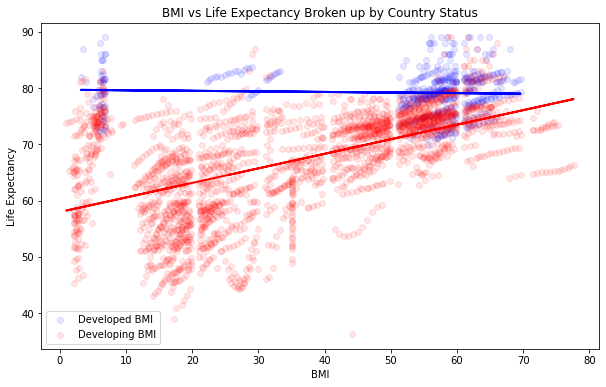

In [25]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.title("BMI vs Life Expectancy Broken up by Country Status")

plt.scatter(bmi_1, developed_bmi['life_expectancy'],  color='blue', alpha = 0.1, label = 'Developed BMI')
plt.scatter(bmi_2, developing_bmi['life_expectancy'],  color='red', alpha = 0.1, label = 'Developing BMI')

plt.plot(bmi_1, pred_1,  color='blue', linewidth=2)
plt.plot(bmi_2, pred_2,  color='red', linewidth=2)

plt.ylabel('Life Expectancy')
plt.xlabel('BMI')
plt.legend()

In [27]:
df.bmi.describe()

count    2928.000000
mean       38.201673
std        19.852777
min         1.000000
25%        19.400000
50%        43.000000
75%        56.100000
max        77.600000
Name: bmi, dtype: float64

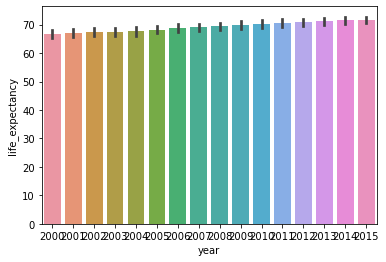

In [30]:
sns.barplot(df.year, df.life_expectancy)

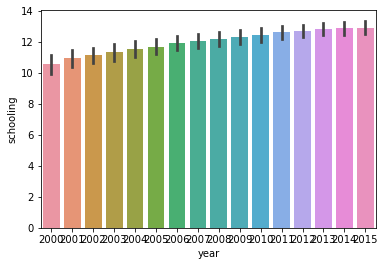

In [31]:
sns.barplot(df.year, df.schooling)

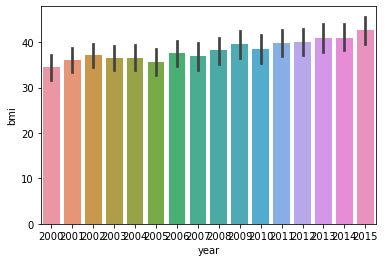

In [32]:
sns.barplot(df.year, df.bmi)